C:\Users\ivaga\AppData\Local\Temp\ipykernel_18484\3172110643.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_population = pd.read_html(str(data))[0]


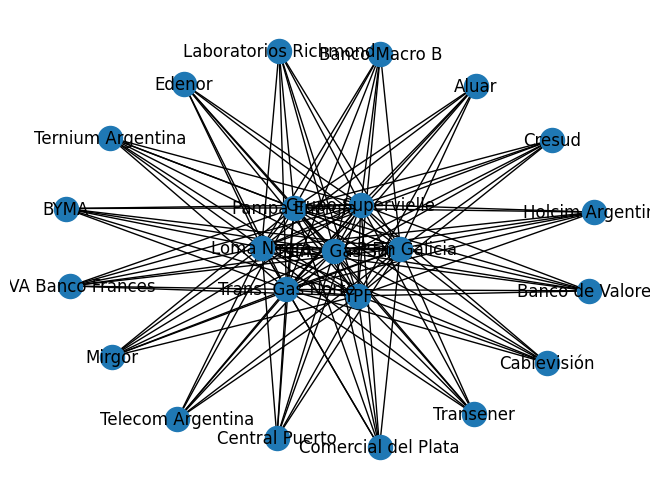

In [44]:
# Importando las bibliotecas necesarias
import networkx as nx
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import os

# Constantes
URL = "https://es.investing.com/equities/argentina"
CSV_FILE = "mercados/fundamentales.csv"

#Esta función obtiene los datos de la web.
def obtener_datos_web(url):

    req = requests.get(url)
    soup = BeautifulSoup(req.text)
    data = soup.find_all("table")[0]
    df_population = pd.read_html(str(data))[0]
    df_population.head()
    export_csv = df_population.to_csv(r"argentina.csv", index = None, header = True)

# Esta función lee los datos del archivo csv.
def leer_csv(file):
        
    df = pd.read_csv(file)
    return df

# Esta función crea el grafico A
def grafico_A(df):
    G = nx.Graph()

    for index, row in df.iterrows():
        G.add_node(row['Nombre'], 
                   ultimo=float(row['Último'].replace('.', '').replace(',', '')), 
                   maximo=row['Máximo'].replace(',', ''), 
                   minimo=row['Mínimo'].replace(',', ''))

    for node1 in G.nodes(data=True):
        for node2 in G.nodes(data=True):
            if node1 != node2:
                if float(node1[1]['ultimo']) > 1500000 or float(node2[1]['ultimo']) > 1500000:
                    G.add_edge(node1[0], node2[0])

    nx.draw(G, with_labels=True)
    plt.show()
    


datos_web = obtener_datos_web(URL)
df = leer_csv('argentina.csv')
grafico_A(df)


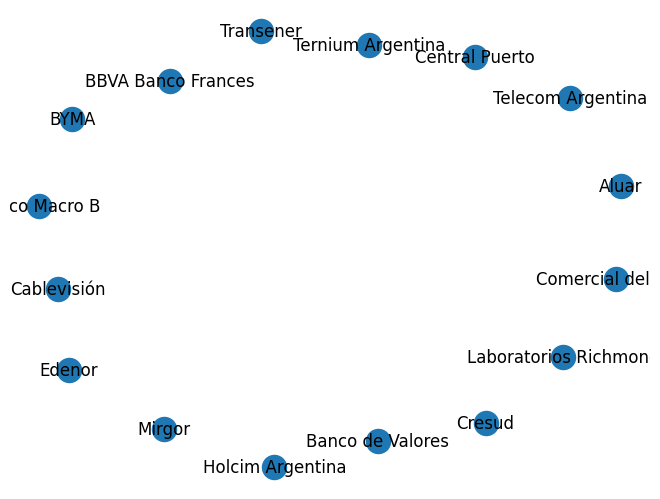

In [52]:
# Importando las bibliotecas necesarias
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Esta función lee los datos del archivo csv.
def leer_csv(file):   
    df = pd.read_csv(file)
    return df

# Esta función crea el grafico A
def grafico_A(df):
    G = nx.Graph()

    for index, row in df.iterrows():
        ultimo = float(row['Último'].replace('.', '').replace(',', ''))
        if ultimo <= 1500000:  # Solo añadir empresas que no superen los 1.500.000 de dólares
            G.add_node(row['Nombre'], 
                       ultimo=ultimo, 
                       maximo=row['Máximo'].replace(',', ''), 
                       minimo=row['Mínimo'].replace(',', ''))

    for node1 in G.nodes(data=True):
        for node2 in G.nodes(data=True):
            if node1 != node2:
                if float(node1[1]['ultimo']) > 1500000 and float(node2[1]['ultimo']) > 1500000:
                    G.add_edge(node1[0], node2[0])

    nx.draw(G, with_labels=True)
    plt.show()

df = leer_csv('argentina.csv')
grafico_A(df)


C:\Users\ivaga\AppData\Local\Temp\ipykernel_18484\1697354075.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_population = pd.read_html(str(data))[0]


        Fecha  % var.
0  03.05.2024  +6.36%
1  02.05.2024  +1.83%
2  30.04.2024  +0.60%
3  29.04.2024  +1.77%
4  26.04.2024  +4.26%


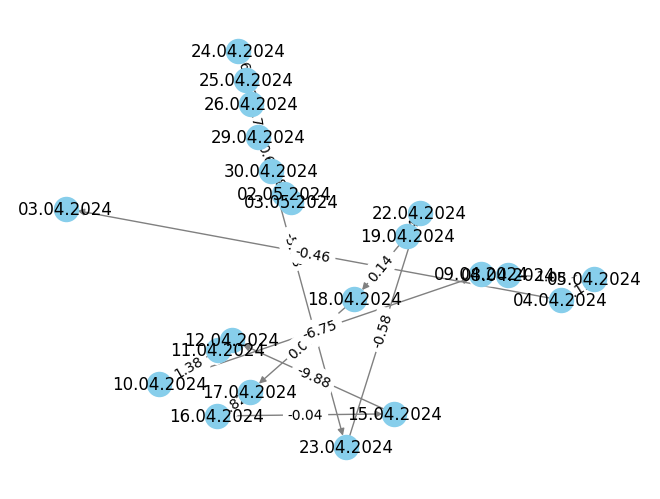

In [53]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

# Ruta del archivo que quieres eliminar
archivo = 'archivo.csv'
datos_filtrados = 'mercados/datos_filtrados.csv'

# Eliminar el archivo
os.remove(archivo)
os.remove(datos_filtrados)

# URL del sitio con los datos
url = "https://es.investing.com/equities/bolsas-y-mercados-argentinos-sa-historical-data"

# Realizar la solicitud con los headers adecuados
req = requests.get(url)

soup = BeautifulSoup(req.text)
data = soup.find_all("table")[0]
df_population = pd.read_html(str(data))[0]
df_population.head()
export_csv = df_population.to_csv(r"archivo.csv", index = None, header = True)

# Filtrar las columnas requeridas
df_filtrado = df_population[['Fecha', '% var.']]

# Muestra las primeras líneas del DataFrame filtrado
print(df_filtrado.head())

# Opcional: exportar a CSV
df_filtrado.to_csv("mercados/datos_filtrados.csv", index=False)

# Cargar los datos
df = pd.read_csv("archivo.csv")

# Eliminar el signo de porcentaje y convertir a flotante
df['% var.'] = df['% var.'].str.strip('%').astype(float)

# Crear el grafo
G = nx.DiGraph()  # DiGraph para respetar la secuencia temporal

# Añadir nodos y aristas
for i in range(len(df) - 1):
    G.add_edge(df.iloc[i]['Fecha'], df.iloc[i + 1]['Fecha'], weight=df.iloc[i]['% var.'])

# Dibujar el grafo
pos = nx.spring_layout(G)  # Posicionamiento de los nodos
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [66]:
# Importando las bibliotecas necesarias
import networkx as nx
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import os

# Constantes
URL = "https://www.merco.info/ar/ranking-merco-empresas"
CSV_FILE = "mercados/fundamentales.csv"

#Esta función obtiene los datos de la web.
def obtener_datos_web(url):
    req = requests.get(url)
    soup = BeautifulSoup(req.text)

    # Encuentra todas las tablas en la página
    tables = soup.find_all("table")

    # Itera sobre cada tabla
    for flag, table in enumerate(tables):
        df_population = pd.read_html(str(table))[0]
        df_population.head()

        # Guarda cada tabla en un archivo CSV separado
        export_csv = df_population.to_csv(r"C:\Users\ivaga\OneDrive\Documentos\GitHub\Mate-3\Tp 1 grafos\tipoEmpresasArg\tipo_empresas_arg" + str(flag) + ".csv", index = None, header = True)


# Esta función lee los datos del archivo csv.
def leer_csv(file):
        
    df = pd.read_csv(file)
    return df

# Esta función crea el grafico A
def grafico_A(df):
    aeropuertos = pd.read_csv('archs/aeropuertos.csv', encoding='latin-1')
    df_a = pd.DataFrame(aeropuertos)
    df_a.head(5)

    vuelos = pd.read_csv("archs/combi_precios.csv", encoding='latin-1')
    df_b = pd.DataFrame(vuelos)
    df_b.head(5)

    DG = nx.DiGraph()
    for i in range(0, len(df_a)):
     DG.add_node(df_a.iloc[i]['COD'])
     i = i + 1
    for i in range(0, len(df_b)):
     DG.add_edge(df_b.iloc[i]['Origen'], df_b.iloc[i]['Destino'])
     i = i + 1

    fig, ax = plt.subplots(figsize=(9,7))
    DG.nodes(data=True)
    nx.draw(DG, node_color="lightblue", edge_color="gray", font_size=8, width=2, with_labels=True,
     node_size=500)
    plt.show()

    df_b = df_b.loc[:, ['Origen', 'Destino', 'Precio']]
    df_b

    DG = nx.DiGraph()
    DG.add_weighted_edges_from([tuple(x) for x in df_b.values])
    DG.edges()

    DG.get_edge_data('AEP','CNQ')
    


datos_web = obtener_datos_web(URL)
df = leer_csv('top_100_Empresas_arg.csv.csv')
grafico_A(df)


C:\Users\ivaga\AppData\Local\Temp\ipykernel_18484\1943943467.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_population = pd.read_html(str(table))[0]
C:\Users\ivaga\AppData\Local\Temp\ipykernel_18484\1943943467.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_population = pd.read_html(str(table))[0]
C:\Users\ivaga\AppData\Local\Temp\ipykernel_18484\1943943467.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_population = pd.read_html(str(table))[0]
C:\Users\ivaga\AppData\Local\Temp\ipykernel_18484\1943943467.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be remove

FileNotFoundError: [Errno 2] No such file or directory: 'top_100_Empresas_arg.csv.csv'

In [91]:
import pandas as pd 

df = pd.read_csv('consumer_complaints.csv')

df.head()

df = df.drop(['date_received', 'sub_product','zipcode','tags', 'complaint_id','issue','sub_issue', 'consumer_complaint_narrative', 'company_public_response', 'consumer_consent_provided', 'date_sent_to_company', 'company_response_to_consumer', 'timely_response', 'consumer_disputed?', 'company_response_to_consumer'], axis=1)

df.head()

DG = nx.DiGraph()

for i in range(0, len(df)):
 DG.add_edge(df.iloc[i]['product'], df.iloc[i]['company'])
 i = i + 1

fig, ax = plt.subplots(figsize=(9,7))
DG.nodes(data=True)
nx.draw(DG, node_color="lightblue", edge_color="gray", font_size=8, width=2, with_labels=True,
 node_size=500)
plt.show()


,product,company,state,submitted_via
0,Mortgage,U.S. Bancorp,CA,Referral
1,Mortgage,Wells Fargo & Company,CA,Referral
2,Credit reporting,Wells Fargo & Company,NY,Postal mail
3,Student loan,"Navient Solutions, Inc.",MD,Email
4,Debt collection,Resurgent Capital Services L.P.,GA,Web
